In [1]:
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our anomaly dection algorithms
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# function to split our data
from sklearn.model_selection import train_test_split

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

# Sklearn Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# hyper-parameter turning.
from sklearn.model_selection import GridSearchCV



# Use inline so our visualizations display in notebook
%matplotlib inline


In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Columns Descriptions
 * **Time**:  Number of seconds elapsed between this transaction and the first transaction in the dataseNumber of seconds elapsed between this transaction and the first transaction in the datase
 * **V1 - V28**: Contains numerical inputs obtained from Principal Component Analysis (PCA) transformation. PCA explanation *https://www.youtube.com/watch?v=FgakZw6K1QQ*
 * **Amount**: The amount of the transaction.
 * **Class**: Whether transaction is fraudulent(1) or genuine(0). 

## EDA

In [4]:
# No null values dataset is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

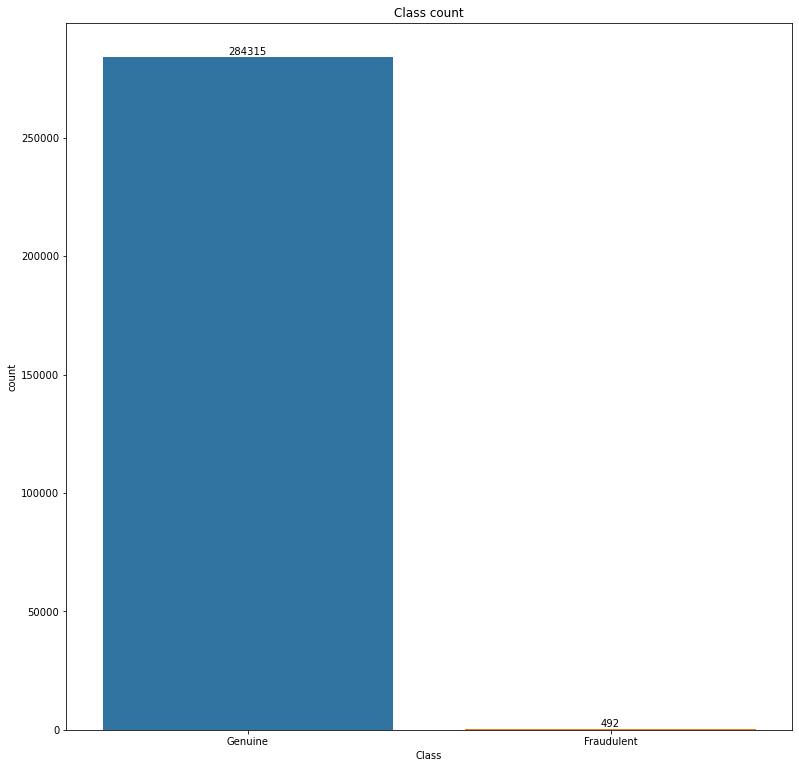

In [5]:
fig, ax = plt.subplots(figsize=(13, 13))
 
# drawing the plot
sns.countplot(x = df['Class'])

plt.title("Class count")

# Tick labels
plt.xticks([0,1],["Genuine", "Fraudulent"])

# Amounts on top of bars
ax = plt.gca()
plt.bar_label(ax.containers[0])


plt.show()

In [6]:
genuine = df[df["Class"] == 0]
fraudulent = df[df["Class"] == 1]

In [7]:
genuine["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraudulent["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Out of *280,000+* transactions **492** are fraudulent.

C:\Users\xzero\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Genuine')

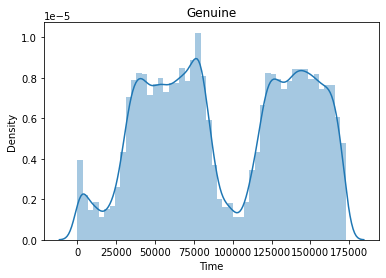

In [9]:
sns.distplot(genuine["Time"])
plt.title("Genuine")

C:\Users\xzero\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fraudulent')

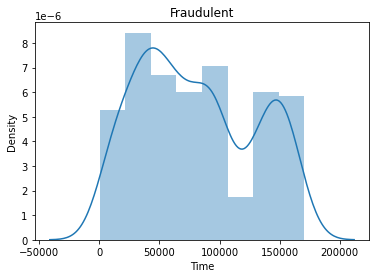

In [10]:
sns.distplot(fraudulent["Time"])
plt.title("Fraudulent")

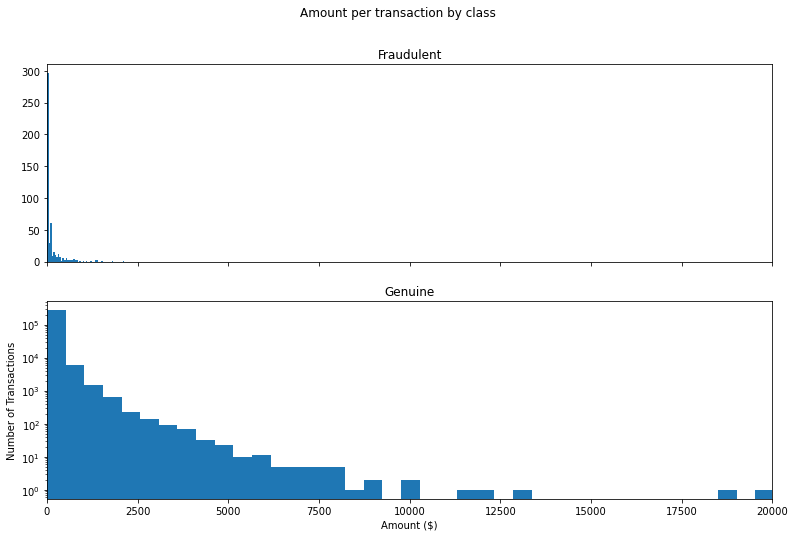

In [11]:
rcParams['figure.figsize'] = 13, 8
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraudulent.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

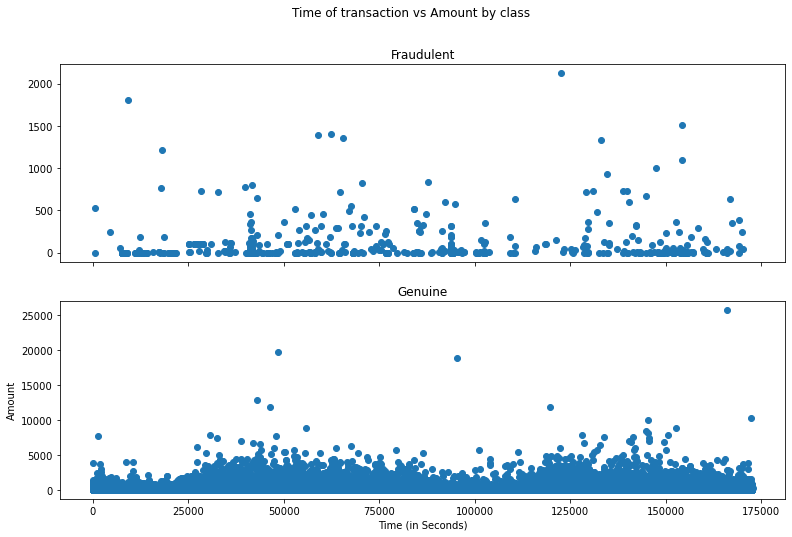

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraudulent.Time, fraudulent.Amount)
ax1.set_title('Fraudulent')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Anomaly Detection

In [13]:
X = df.loc[:, "Time":"Amount"]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# First using Decision Trees
model = DecisionTreeClassifier(max_depth=2)

In [15]:
# Fiting our model with our training data. 
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
# Making predictions
y_pred = model.predict(X_test)

In [17]:
n_errors = (y_test != y_pred).sum()
print("Decision Trees Errors:", n_errors)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)

print("")
print(classification_report(y_test,y_pred))

Decision Trees Errors: 46
Accuracy Score: 0.999192
Precision Score: 0.788889
Recall Score: 0.724490
F1 Score: 0.755319

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.72      0.76        98

    accuracy                           1.00     56962
   macro avg       0.89      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



### Scores explaination
Accuracy Score is really high becuase our data is really unbalanced all the model is doing
is mostly guessing the each example is genuine 0.1727 % of data is fraudulent. Should focus on the combination of both recall and precision score so f1 score should be our focus.
0.1727 % of data is fraudulent 

In [18]:
(len(fraudulent) / (len(fraudulent) + len(genuine))) * 100

0.1727485630620034

In [19]:
model = RandomForestClassifier()

In [20]:
# Fiting our model with our training data. 
model.fit(X_train,y_train)
print("Done")

Done


In [21]:
# Making predictions
y_pred = model.predict(X_test)
print("Done")

Done


In [22]:
n_errors = (y_test != y_pred).sum()
print("Random Forest Classifiers Errors:", n_errors)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)

print("")
print(classification_report(y_test,y_pred))




Random Forest Classifiers Errors: 24
Accuracy Score: 0.999579
Precision Score: 0.986842
Recall Score: 0.765306
F1 Score: 0.862069

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Algorithms for Anomaly Detection
In this case we want to use algorithms thats is specifically used for anomaly detection like **Isolation Forest**, **Local Outlier Factor**.

In [23]:
## First we need outlier fraction
outlier_fraction = len(fraudulent)/len(genuine)

## sample dataset
data_sample = df.sample(frac = 0.2,random_state = 42)
X = data_sample.loc[:, "Time":"Amount"]
Y = data_sample["Class"]

In [24]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=1000, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [25]:
## Isolation forest
classifiers["Isolation Forest"].fit(X)
scores_prediction = classifiers["Isolation Forest"].decision_function(X)
y_pred = classifiers["Isolation Forest"].predict(X)

In [26]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics
print("{}: {} errors".format("Isolation Forest",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))


f1 = f1_score(Y, y_pred)
print("F1 Score: %f" % f1)

print("Classification Report :")


print(classification_report(Y,y_pred))


Isolation Forest: 133 errors
Accuracy Score :
0.9976650690823546
F1 Score: 0.324873
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.32      0.33      0.32        98

    accuracy                           1.00     56961
   macro avg       0.66      0.66      0.66     56961
weighted avg       1.00      1.00      1.00     56961



In [27]:
## Local Outlier Factor
y_pred = classifiers["Local Outlier Factor"].fit_predict(X)
scores_prediction = classifiers["Local Outlier Factor"].negative_outlier_factor_

In [28]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics
print("{}: {} errors".format("Local Outlier Factor",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))


f1 = f1_score(Y, y_pred)
print("F1 Score: %f" % f1)

print("Classification Report :")


print(classification_report(Y,y_pred))

Local Outlier Factor: 195 errors
Accuracy Score :
0.9965766050455575
F1 Score: 0.010152
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.01      0.01      0.01        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



### Conclusion

* Isolation forest did much better than local outlier factor with LOF only having around 1% f1 score and Isolation forest getting a around %32.

* Our tunning of Isolation forest isn't great since our decision trees and our Random Forest classifier both did better.